In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from osgeo import gdal
from osgeo import ogr
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

<AxesSubplot:>

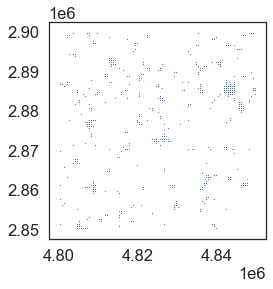

In [8]:
useful_tiles_51 = gpd.read_file('../Grids/GridHugeTile51/usefultiles/UsefulTiles51.shp')
useful_tiles_51.plot()

In [ ]:
input_file="data\AustriaHugeTiles\HigeTile51\DOP_CRS3035RES50000mN2850000E4800000_20220128.tif"
output_file='tiles2/AustriaHugeClip_%s_%s.tif'%(i,j)
shp_file="SingleTilesSHP/SingleTile_%s_%s.shp"%(i,j)
print(input_file,output_file,shp_file)
raster = gdal.Warp(output_file,input_file, cutlineDSName=shp_file,cropToCutline=True)
raster = None

In [6]:
#IT WORKS!!!

def dump_poly(raster_fname, vector_fname, ifeat):
    # New filename. Assumes input raster file has '.tif' extension
    # Might need to change how you build the output filename
    fname_out = raster_fname.replace(".tif", f"_{int(ifeat):05}.tif")
    print("me llamaron con los sigueintes params:::",raster_fname, vector_fname, ifeat)
    #Do the actual clipping
    g = gdal.Warp(fname_out, raster_fname, format="GTiff",
                    cutlineDSName=vector_fname,
                    cutlineWhere=f"fid={ifeat:d}",
                    cropToCutline=True)
    #Return the fname just because
    return fname_out

shape_file = '../Grids/GridHugeTile51/usefultiles/UsefulTiles51.shp'
tif_file = "../data/AustriaHugeTiles/HigeTile51/DOP_CRS3035RES50000mN2850000E4800000_20220128.tif"

# Open raster file, select first and unique layer
gg = ogr.Open(shape_file)
layer = gg.GetLayerByIndex(0)
# Loop over all features
for ifeat in layer:
    ifeat = ifeat.GetFieldAsInteger('FID')
    fname_out = dump_poly(tif_file, shape_file, ifeat)
    #print(fname_out)

me llamaron con los sigueintes params::: ../data/AustriaHugeTiles/HigeTile51/DOP_CRS3035RES50000mN2850000E4800000_20220128.tif ../Grids/GridHugeTile51/usefultiles/UsefulTiles51.shp 26
me llamaron con los sigueintes params::: ../data/AustriaHugeTiles/HigeTile51/DOP_CRS3035RES50000mN2850000E4800000_20220128.tif ../Grids/GridHugeTile51/usefultiles/UsefulTiles51.shp 26
me llamaron con los sigueintes params::: ../data/AustriaHugeTiles/HigeTile51/DOP_CRS3035RES50000mN2850000E4800000_20220128.tif ../Grids/GridHugeTile51/usefultiles/UsefulTiles51.shp 26
me llamaron con los sigueintes params::: ../data/AustriaHugeTiles/HigeTile51/DOP_CRS3035RES50000mN2850000E4800000_20220128.tif ../Grids/GridHugeTile51/usefultiles/UsefulTiles51.shp 60
me llamaron con los sigueintes params::: ../data/AustriaHugeTiles/HigeTile51/DOP_CRS3035RES50000mN2850000E4800000_20220128.tif ../Grids/GridHugeTile51/usefultiles/UsefulTiles51.shp 60
me llamaron con los sigueintes params::: ../data/AustriaHugeTiles/HigeTile51/DOP